<div style="background-color: black; color: white; padding: 10px;text-align: center;">
  <strong>Date Published:</strong> October 14, 2025 <strong>Author:</strong> Adnan Alaref
</div>

# 🧩 1️⃣ Gaussian Noise (Feature-wise or Adaptive)

---

### 🔹 Goal
To make the **autoencoder** learn to reconstruct the *clean* data even when the input is slightly corrupted by random continuous noise.  
This trains the model to focus on the **underlying structure** of the data, not the exact numerical values.

---

### 🔹 Intuitive Explanation
Imagine you have a simple vector:

$$
x = [0.2, 0.4, 0.6, 0.8]
$$

If you add Gaussian noise, you slightly “jitter” each feature:

$$
x_{\text{noisy}} = x + \varepsilon, \quad \varepsilon \sim \mathcal{N}(0, \sigma^2)
$$


Example:

$$
x_noisy = [0.25, 0.39, 0.62, 0.79]
$$

The **Denoising Autoencoder (DAE)** sees this noisy version and learns to output the clean version:

$$
[0.2, 0.4, 0.6, 0.8]
$$

---

### 🔹 Mathematical View

$$
x_noisy = x + α ⋅ σₓ ⋅ N(0, 1)
$$

Where:

| Symbol | Meaning |
|:--------|:---------|
| **α** | Hyperparameter controlling overall noise strength |
| **σₓ** | Standard deviation of each feature — scales noise relative to feature variance |
| **𝒩(0,1)** | Standard Gaussian random variable |

This formulation makes the noise **feature-adaptive** — features with higher natural variance get proportionally more noise.

---

## ⚖️ Comparison: Simple Version vs. Adaptive Version

| Aspect | Simple | Adaptive |
|:-------|:--------|:----------|
| **Formula** | x_noisy = x + σ ⋅ N(0, 1)  | x_nosiy = x + σ ⋅ std(x) ⋅ N (0, 1) |
| **Noise strength** | Fixed across all features | Scaled per feature’s natural variance |
| **Simplicity** | ✅ Very simple | Slightly more complex |
| **When to use** | Data is normalized or all features on same scale | Features have very different scales (e.g., income vs. age) |
| **Behavior** | Adds equal noise everywhere | Adds more noise to features with high natural variability |
| **Risk** | Might over-noise small-scale features | More balanced corruption |



## ✅ Final Verdict

| Case | Recommended Version |
|:------|:---------------------|
| **Data normalized to [0,1]** | **Simple version** |
| **Raw tabular data (unscaled)** | **Adaptive version** |
| **Image data (pixels 0–1)** | **Simple version** |
| **Complex numeric features** | **Adaptive version** |



### 🧠 Summary Insight
- If your dataset is **normalized** or features are on the **same scale**, the **simple Gaussian noise** version is perfectly fine.  
- If your features vary greatly in scale (e.g., salary vs. age), use the **adaptive version** to prevent uneven corruption.  
- Both methods are **differentiable** and useful for **denoising autoencoders**, **VAEs**, or **robust feature learning** in general.

> ⚡ *In short:* Adaptive Gaussian noise = balanced robustness.  
> Simple Gaussian noise = quick and effective when scaling is uniform.

---

### 🔹 Why It’s Popular
✅ Works with almost every data type (images, tabular, embeddings)  
✅ **Differentiable** — gradients can flow through during training  
✅ **Smooths the manifold** — encourages better generalization  
✅ Still serves as the **baseline** for most denoising tasks and even **Variational Autoencoders (VAEs)**

---

🔹 Key Insight (Expert View)
* Gaussian noise encourages local invariance —
the DAE learns: **If my input slightly shifts in the continuous space, I should still output the same clean pattern.**

* This is similar to how **humans can recognize a word** even if some **letters are blurred or slightly distorted.**

**In short:**  
> Gaussian noise encourages robust feature learning by teaching the model to reconstruct structure rather than memorize exact input values — and the adaptive version keeps this effect balanced across heterogeneous features.

---


## **🧩 1: Applay Gussain Noise Function.**
- #### **First: Gaussian Noise If Data is Normalized or All Features on Same Scale.**
- #### **Second: Gaussian Noise If Data isn't Normalized or All Features ont on Same Scale.**

In [1]:
import torch
from torch import Tensor
x = torch.rand(8,100)
print(x.shape) # batch of 8 samples, 100 features
print(f"Tensor before applay any noise: {x[0]}")

torch.Size([8, 100])
Tensor before applay any noise: tensor([0.9164, 0.0484, 0.5368, 0.1882, 0.4875, 0.0494, 0.7560, 0.0575, 0.6414,
        0.0453, 0.0069, 0.8790, 0.9487, 0.4972, 0.7216, 0.6114, 0.3897, 0.3931,
        0.0611, 0.0779, 0.6978, 0.4456, 0.3012, 0.3895, 0.6674, 0.0289, 0.8505,
        0.5604, 0.6167, 0.3811, 0.3947, 0.5356, 0.0375, 0.7490, 0.5497, 0.6621,
        0.0480, 0.6819, 0.3660, 0.5210, 0.3607, 0.1114, 0.9719, 0.8940, 0.2139,
        0.8764, 0.8701, 0.5133, 0.3496, 0.8796, 0.1908, 0.6683, 0.4993, 0.8960,
        0.5988, 0.1843, 0.4867, 0.2802, 0.6079, 0.5262, 0.9329, 0.9559, 0.6554,
        0.6376, 0.8663, 0.6348, 0.7904, 0.0499, 0.8897, 0.8371, 0.1699, 0.3668,
        0.8087, 0.7210, 0.5672, 0.3343, 0.9147, 0.7144, 0.9925, 0.0845, 0.3489,
        0.0314, 0.2287, 0.2593, 0.7160, 0.9939, 0.6943, 0.3882, 0.8165, 0.5930,
        0.1022, 0.3560, 0.9155, 0.1694, 0.6851, 0.3804, 0.9102, 0.5468, 0.3806,
        0.8163])


In [2]:
def add_gaussian_noise(data:Tensor,
                       sigma:float=0.1,
                       normalized: bool=True,
                       clamp: bool = True)->Tensor:
    """
      Add Gaussian noise to a tensor (used for Denoising Autoencoders).

      Parameters
      ----------
      data : torch.Tensor
          Input tensor of shape (batch_size, num_features) or any shape.
      sigma : float
          Standard deviation factor controlling noise intensity.
      normalized : bool, default=True
          If True, noise is applied directly (assumes normalized data in [0,1] or [-1,1]).
          If False, noise is scaled by the per-feature standard deviation.

      Returns
      -------
      torch.Tensor
          Noisy version of the input tensor (same shape and device).
      """
    if normalized:
      noise = torch.randn_like(data) * sigma
    else:
      std_per_feature = data.std(dim=0,keepdim=True)
      noise = torch.randn_like(data) * sigma * std_per_feature

    data_noisy = data + noise
    return torch.clamp(data_noisy, 0., 1.) if clamp else data_noisy

In [3]:
x_noisy = add_gaussian_noise(data=x,sigma=0.2)
x_noisy[0]

tensor([0.6922, 0.0186, 0.6421, 0.1461, 0.2766, 0.1560, 0.8492, 0.3809, 0.9049,
        0.0000, 0.6168, 0.8947, 1.0000, 0.3500, 0.6143, 0.3674, 0.3878, 0.1539,
        0.0189, 0.0713, 0.8125, 0.5263, 0.2170, 0.4520, 0.6245, 0.0593, 0.7104,
        0.4374, 0.9902, 0.3301, 0.1507, 0.1926, 0.2937, 0.8687, 0.5567, 0.5402,
        0.1688, 0.9148, 0.3905, 0.5375, 0.1245, 0.1541, 0.6034, 0.8518, 0.0256,
        1.0000, 1.0000, 0.1783, 0.3876, 1.0000, 0.1897, 0.5867, 0.5346, 1.0000,
        1.0000, 0.5283, 0.5337, 0.4491, 0.5449, 0.4855, 0.9984, 1.0000, 0.5628,
        0.7235, 0.5622, 0.6220, 0.7679, 0.3236, 1.0000, 0.7443, 0.3655, 0.3048,
        0.5673, 0.6353, 0.7021, 0.4755, 1.0000, 0.9575, 0.7371, 0.0000, 0.3867,
        0.1543, 0.2551, 0.0000, 0.6014, 1.0000, 0.7021, 0.3265, 0.7005, 0.5427,
        0.2019, 0.2938, 0.4895, 0.0000, 0.5301, 0.3909, 1.0000, 0.7730, 0.6040,
        1.0000])

# **🧩 2️⃣ Masking Noise.**

🧩 **1. Concept Overview**  
Masking noise is another common type of noise used to corrupt input data for denoising autoencoders, but instead of adding random values (like Gaussian noise), it randomly removes information from the input.

---

⚙️ **2. Definition**  
Masking noise randomly sets a fraction of the input features (or pixels) to zero.  

This means:  
If your input is a vector 

$$
x = [0.8, 0.2, 0.5, 0.9],  
$$

and you apply **50% masking noise** → randomly pick half of the values and replace them with `0`.

**Example:**  
$$
x_noisy = [0.0, 0.2, 0.0, 0.9]
$$

---

💡 **3. Intuition**  
Masking noise forces the autoencoder to:

- infer missing information from the unmasked part,  
- learn robust feature representations,  
- behave like a data imputer — filling in missing values.

That’s why it’s especially useful for **sparse or binary data** (like text embeddings, one-hot vectors, or normalized images).

---

**Let's Code..!**

## **🧩 1. Manual Masking Noise (Non-differentiable mask)**

In [4]:
def add_masking_noise(data:Tensor,
                      corrupting_ratio:float)->Tensor:
  """
    Apply masking noise by randomly setting a fraction of input elements to zero.

    Parameters
    ----------
    data : torch.Tensor
        Input tensor of shape (batch_size, num_features) or any shape.
    corrupting_ratio : float
        Fraction of elements to set to zero (between 0 and 1).

    Returns
    -------
    torch.Tensor
        Noisy tensor with a subset of elements masked to zero.
    """
  if not (0.0 <= corrupting_ratio <=1.0):
    raise ValueError("corruption_ratio must be between 0 amd 1.")

  # Generate a random binary mask (1 = keep, 0 = drop)
  mask = (torch.rand_like(data) > corrupting_ratio).float()

  # Apply the mask
  data_noisy = data * mask
  return data_noisy

In [5]:
x = torch.rand(2, 5)
print("Original:\n", x)
x_noisy = add_masking_noise(x, corrupting_ratio=0.4)
print("Noisy:\n", x_noisy)

Original:
 tensor([[0.7772, 0.3034, 0.7721, 0.9192, 0.8576],
        [0.6219, 0.2587, 0.6809, 0.8733, 0.0182]])
Noisy:
 tensor([[0.0000, 0.3034, 0.7721, 0.9192, 0.0000],
        [0.6219, 0.0000, 0.6809, 0.8733, 0.0182]])


---
✅ **What Happens**  
`torch.rand_like(x)` generates uniform random numbers in the range **[0, 1]**.  

- `(> corruption_rate)` keeps roughly **(1 − corruption_rate)** fraction of values.  
- Multiplying by the mask sets **~30% of values to zero.**

---

⚙️ **Pros**
- 🎯 Direct control of which features get masked.  
- 🔁 Perfectly reproducible (if you set `torch.manual_seed`).  
- 🧠 Easy to visualize — good for teaching and analysis.  

---

⚠️ **Cons**
- 🚫 The binary mask operation is **non-differentiable**, meaning the mask doesn’t propagate gradients — which is fine for **input corruption**, but **not trainable** if you wanted to make the masking learnable.
---

## **🔄 2. Differentiable Masking (Using torch.nn.functional.dropout)**

In [6]:
import torch.nn.functional as F
y = torch.tensor([[0.2, 0.5, 0.9, 0.3]])
y_noisy = F.dropout(y, p=0.3, training=True)

print("Original:\n", y)
print("Noisy:\n", y_noisy)

Original:
 tensor([[0.2000, 0.5000, 0.9000, 0.3000]])
Noisy:
 tensor([[0.2857, 0.0000, 1.2857, 0.0000]])


---
✅ **What Happens**  
`dropout` randomly zeroes elements of `y` with probability **p = 0.3**.  

- It scales the remaining elements by `1 / (1 - p)` to maintain the expected value of the tensor.  
- It’s **differentiable** — gradients flow through the surviving elements.  

---

⚙️ **Pros**
- ⚡ Built-in, GPU-optimized, and differentiable.  
- 🔁 Automatically handles scaling of activations.  
- 🧩 Ideal for DAEs and neural nets where you want consistent behavior.  

---

⚠️ **Cons**
- 🔄 Slight difference in behavior: dropout **scales the surviving units**.  
- Example: if `p = 0.3`, surviving elements are multiplied by `1 / 0.7 ≈ 1.43`.  
- This keeps the mean activation constant — useful in **training neural nets**, but not identical to **true masking noise** if you care about preserving absolute values.  

---

🧠 **3. Professional Summary**

| **Method**      | **Operation**     | **Scales surviving values?** | **Differentiable** | **Recommended for** |
|------------------|------------------|------------------------------|--------------------|---------------------|
| Manual Mask      | `x * mask`       | ❌ No                        | 🚫 No              | Denoising Autoencoder input corruption |
| Dropout          | `F.dropout(x, p)` | ✅ Yes                       | ✅ Yes             | Neural networks & differentiable noise |

---

💡 **Developer Tip**  
If you want **true masking noise** for a DAE, use your **manual method**.  
If you want a **learnable, differentiable regularization**, use **dropout**.

---

# **🎲 Import Libraries.**

In [7]:
import torch
import torchvision
import numpy as np
from torch import Tensor
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader

import warnings
warnings.filterwarnings(action='ignore')
warnings.simplefilter(action='ignore' ,category=FutureWarning)

# **🎯 Comparison: Gaussian vs Masking Noise.**

100%|██████████| 9.91M/9.91M [00:00<00:00, 59.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.80MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.30MB/s]



Images shape: torch.Size([10, 1, 28, 28])


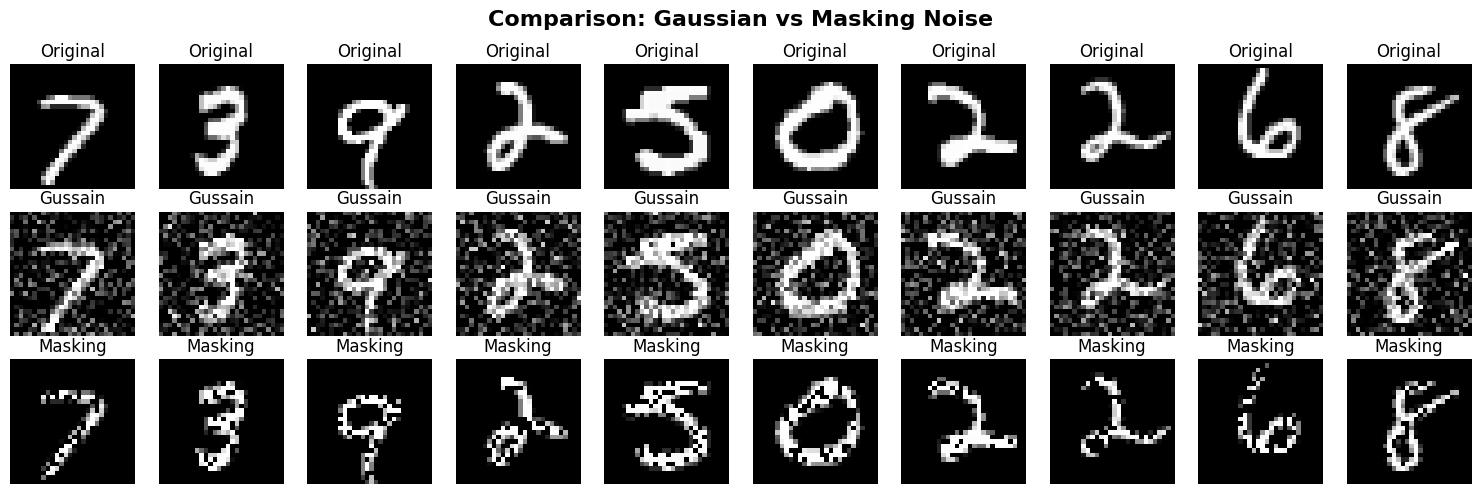

In [8]:
# -----------------------------
# 🖼️ Load one batch from MNIST
# -----------------------------
_transform = transforms.Compose([
    transforms.ToTensor()
  ])

BATCH_SIZE = 10
data = torchvision.datasets.MNIST(root='/.data', transform=_transform, train=True, download=True)
dataloader = DataLoader(dataset=data, batch_size=BATCH_SIZE, shuffle=True)

images,_ = next(iter(dataloader)) # batch of 10 grayscale images in [0, 1]
print(f"\nImages shape: {images.shape}")

# -----------------------------
# 🌪️ Apply Noises
# -----------------------------
gussain_images = add_gaussian_noise(data=images,sigma=0.3)
masking_images = add_masking_noise(data=images,corrupting_ratio=0.3)

# -----------------------------
# 📊 Visualization
# -----------------------------
def show_comparison(original, noisy1, noisy2):

  cols = len(original)
  titles = ['Original', 'Gussain', 'Masking']

  fig,axes = plt.subplots(nrows=3 ,ncols=cols, figsize=(15,5))
  fig.suptitle("Comparison: Gaussian vs Masking Noise", fontsize=16, fontweight='bold')
  for i in range(len(original)):
    # Original
    axes[0,i].imshow(original[i].squeeze(), cmap='gray')
    axes[0,i].set_title(titles[0])
    axes[0,i].axis('off')

    # Gaussian
    axes[1,i].imshow(noisy1[i].squeeze(), cmap='gray')
    axes[1,i].set_title(titles[1])
    axes[1,i].axis('off')

    # Masking
    axes[2,i].imshow(noisy2[i].squeeze(), cmap='gray')
    axes[2,i].set_title(titles[2])
    axes[2,i].axis('off')


  plt.tight_layout()
  plt.show()

show_comparison(original=images, noisy1=gussain_images, noisy2=masking_images)

<a id="Import"></a>
<p style="background-color: #000000; font-family: 'Verdana', sans-serif; color: #FFFFFF; font-size: 160%; text-align: center; border-radius: 25px; padding: 12px 20px; margin-top: 20px; border: 2px solid transparent; background-image: linear-gradient(black, black), linear-gradient(45deg, #FF00FF, #00FFFF, #FFFF00, #FF4500); background-origin: border-box; background-clip: content-box, border-box; box-shadow: 0px 4px 20px rgba(255, 105, 180, 0.8);">
   Thanks & Upvote ❤️</p>